In [18]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI

from typing import TypedDict

In [19]:
class BlogClass(TypedDict):
    topic: str
    outline: str
    content: str

In [20]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [21]:
def outline_generator(state: BlogClass) -> BlogClass:
    """
    This is a function to generate outline with topic
    """
    topic = state['topic']
    state['outline'] = llm.invoke(f"Generate a outline in this topic: {topic} in 50 words").content
    return state

def blog_generator(state: BlogClass) -> BlogClass:
    """
    This will generate a blog content based on topic and outline
    """
    topic = state['topic']
    outline = state['outline']
    state['content'] = llm.invoke(f"Generate a blog content with this topic - \n{topic}\nand in this outline format- \n{outline} in 50 words").content
    return state

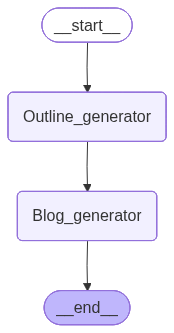

In [23]:
## Define the state graph
builder = StateGraph(BlogClass)

## Define the node
builder.add_node("Outline_generator", outline_generator)
builder.add_node("Blog_generator", blog_generator)

## Define the edge
builder.add_edge(START, "Outline_generator")
builder.add_edge("Outline_generator", "Blog_generator")
builder.add_edge("Blog_generator", END)

## Compile
graph = builder.compile()

## Display graph
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
response = graph.invoke({"topic": "Agentic AI"})

In [17]:
response['content']

"Here's a blog content on Agentic AI, following your outline and exactly 50 words:\n\n**Agentic AI: The Future of Autonomy**\n\n*   **I. Definition:** Agentic AI autonomously sets goals, plans, and acts, perceiving and adapting dynamically.\n*   **II. Key Characteristics:** Self-direction, perception-action loops, memory, reasoning, plus tool use.\n*   **III. Applications:** Robotics, complex problem-solving, personal assistants, and scientific discovery.\n*   **IV. Challenges/Risks:** Safety, control, ethics, alignment, and unintended outcomes.\n*   **V. Future Outlook:** Enhanced autonomy, human-AI collaboration, and responsible development."